QnA 에서 찾은 정보

1. Validation set도 최종 학습에 사용 가능.
2. 발생일시는 해당 일시에 화재가 발생했는지의 의미 -> 해당 인자로 인해 기후 정보등이 도출 -> 시간별, 계절별 요인을 도출하는 인자로 활용 가능
3. 인구수는 통계청 데이터를 기반( 2018년 기준 )
4. lw 변수들은 '건축법 시행령 제5조의5 제4호'에 정의된 건축물(다중이용건축물), 연면적 합계 3천제곱미더이상인 건축물, 다중이용업소등을 대상으로 조사된 값들입니다. 해당 변수들은 0~5점 까지의 분포이며, 높을수록 좋습니다. 가스와 전기 에너지 사용량 데이터는 건축데이터 민간개방시스템(http://open.eais.go.kr/) 에서 수급된 데이터로서, 값이 없는 것들은 해당 시스템에 대상이 아닌 건축물이라는 의미이며, 0인 경우는 값이 실제 0인 경우입니다. 
5. bldng_cnt 의미 : 해당 데이터는 지적(땅의 1필지)를 기준으로 작성된 데이터 입니다. 즉 1필지의 땅에 여러채의 건물이 있는 경우가 있습니다.(예: 아파트) 그 때 건물수를 건물채수라고 함.
6. lnd_ar (토지면적) 의미 : 토지면적은 해당 필지의 면적 입니다. 토지면적이 0인 경우는 값이 누락된 경우라고 생각하시면 됩니다. 
7. 강수량같은 경우 0인 경우는 강우가 있기는 했지만 그 양이 거의 측정되지 않은 경우이며, NA의 경우는 실제 전혀 강우가 없는 경우임.
8. 













## 0. Load Dependencies & Data 

In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [35]:
work_dir = '/Users/ieunpyo/PycharmProjects/Kaggle/gimhae_fire/'

train_set = pd.read_csv((work_dir + 'PJT002_train.csv'),encoding='utf-8' )
validation_set = pd.read_csv((work_dir + 'PJT002_validation .csv'),encoding='utf-8' )
# 일단 무거우니까 test_set 놔 둠.
# test_set = pd.read_csv((work_dir + '/' + 'PJT002_test.csv')

In [36]:
train_set[train_set['fr_yn']=='Y'].shape

(7657, 180)

In [37]:
train_set['lw_13101010']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
59194   NaN
59195   NaN
59196   NaN
59197   NaN
59198   NaN
Name: lw_13101010, Length: 59199, dtype: float64

## 1. EDA

In [38]:
train_set.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26:15,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38:59,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Columns: 180 entries, dt_of_fr to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(21)
memory usage: 81.3+ MB


#####  우선, 170여개의 변수 찍어 보자

In [40]:
train_set.iloc[0:5,0:12]

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,주거용
1,2018-09-30 08:26:15,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,0.0,NaN
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,0.0,주거용
3,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,주거용
4,2018-04-22 05:38:59,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,NaN,NaN


In [41]:
train_set.iloc[:,2].value_counts(dropna=False) # bldng_us

NaN           27677
단독주택          20232
제1종근린생활시설      2350
제2종근린생활시설      2262
창고시설           1513
동.식물 관련시설      1467
공장             1179
공동주택            941
숙박시설            262
노유자시설           205
교육연구시설          185
종교시설            161
업무시설            131
자동차관련시설         119
위험물저장및처리시설      115
분뇨.쓰레기처리시설       55
판매시설             52
운동시설             42
문화및집회시설          38
위락시설             35
근린생활시설           31
관광휴게시설           30
의료시설             27
교육연구및복지시설        18
수련시설             15
운수시설             12
발전시설             11
방송통신시설           11
묘지관련시설            9
교정및군사시설           7
장례식장              3
공공용시설             1
파출소               1
판매및영업시설           1
시장                1
Name: bldng_us, dtype: int64

In [42]:
train_set.iloc[:,3].value_counts(dropna=False) # bldng_archtctr

NaN            27665
벽돌구조            7377
일반목구조           6852
철근콘크리트구조        6694
블록구조            4087
경량철골구조          3378
일반철골구조          1938
조적구조             398
강파이프구조           395
기타조적구조           176
석구조               55
철골철근콘크리트구조        43
기타강구조             36
철골콘크리트구조          35
기타구조              27
목구조               17
프리케스트콘크리트구조       14
통나무구조             11
기타콘크리트구조           1
Name: bldng_archtctr, dtype: int64

In [43]:
train_set.iloc[:,4].value_counts(dropna=False) # bldng_cnt

1      19232
2      12712
3       9352
4       6201
5       3855
       ...  
174        1
138        1
110        1
77         1
223        1
Name: bldng_cnt, Length: 96, dtype: int64

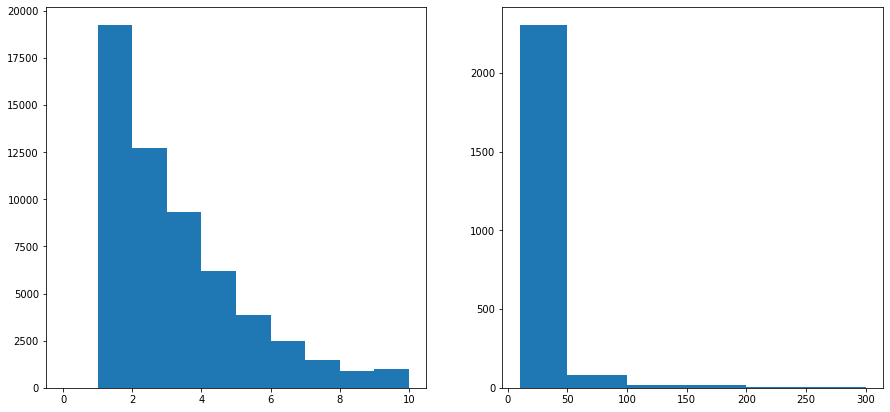

In [44]:
fig = plt.figure(figsize=[15,7])
subplt_1, subplt_2 = plt.subplot(1,2,1), plt.subplot(1,2,2)
subplt_1.hist(train_set.iloc[:,4],bins=[0,1,2,3,4,5,6,7,8,9,10])
subplt_2.hist(train_set.iloc[:,4],bins=[10,50,100,200,300]) # 세로축의 size가 다른 것 유의.
plt.show()

In [45]:
train_set.iloc[0:5,5:12]

,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn
0,69.42,69.42,0.0,1977,1.0,0.0,주거용
1,46.29,46.29,0.0,NaN,1.0,0.0,NaN
2,583.80,2516.76,1446.0,2.00011e+07,5.0,0.0,주거용
3,48.92,48.92,0.0,1936,1.0,0.0,주거용
4,0.00,0.00,0.0,NaN,NaN,NaN,NaN


In [46]:
# 내가 만질 변수
train_set.iloc[0:5,12:17]

,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt
0,10.7,NaN,0.9,200.0,96.0
1,19.5,NaN,0.5,20.0,74.0
2,15.5,NaN,2.0,90.0,21.0
3,20.6,NaN,0.4,0.0,91.0
4,12.7,NaN,0.6,360.0,89.0


In [47]:
# 가스 및 전기 월별 사용양
train_set.iloc[0:10,17:137] 

,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,...,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# lw 변수
train_set.iloc[0:5,137:151] 

,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### lw 변수들은 '건축법 시행령 제5조의5 제4호'에 정의된 건축물(다중이용건축물), 연면적 합계 3천제곱미더이상인 건축물, 다중이용업소등을 대상으로 조사된 값들입니다. 해당 변수들은 0~5점 까지의 분포이며, 높을수록 좋습니다. 값이 없는 것은 그 대상이 아닌 것입니다. 

.

In [49]:
train_set.iloc[0:5,151:157]

,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm
0,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불)
1,대,86366,계획관리지역,지정되지않음,단독,세로한면(가)
2,답,107560,제2종일반주거지역,지정되지않음,연립,중로한면
3,대,97550,제1종일반주거지역,지정되지않음,단독,세로한면(불)
4,임,130501,자연환경보전지역,지정되지않음,자연림,세로한면(불)


In [51]:
train_set.iloc[0:5,157:162]

,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc
0,경상남도 창녕군 창녕읍,17360.0,4547,NaN,133
1,경상남도 의령군 가례면,1791.0,6388,122581.0,489
2,경상남도 창녕군 창녕읍,17285.0,3340,618105.0,143
3,경상남도 창원시의창구 대산면,7327.0,179,719542.0,1585
4,경상남도 창녕군 창녕읍,17278.0,4822,NaN,603


In [52]:
train_set.iloc[0:5,162:163] 

,fr_mn_cnt
0,137.0
1,85.0
2,137.0
3,176.0
4,137.0


In [53]:
# 인접한 cctv 거리, 100m 이내 cctv 개수 등...
train_set.iloc[0:5,163:171]

,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc
0,N,112,0,0,1891,29231,11322,88
1,N,818,0,0,4533,20480,3369,7727
2,N,165,0,0,277,31197,12451,72
3,N,131,0,0,438,4270,407,508
4,N,686,0,0,1702,29778,12487,707


In [61]:
# y_variable - fr_yn
train_set.iloc[0:5,171:180]

,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
train_set.iloc[0:5,180:181]

""
0
1
2
3
4


## 1-2) EDA_2 ( 맡은 변수)

In [15]:
# 내가 만질 변수_1
train_set.iloc[0:5,12:17]

,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt
0,10.7,NaN,0.9,200.0,96.0
1,19.5,NaN,0.5,20.0,74.0
2,15.5,NaN,2.0,90.0,21.0
3,20.6,NaN,0.4,0.0,91.0
4,12.7,NaN,0.6,360.0,89.0


*tmptr : 온도*

*prcpttn : 강수량*

***비가 안 왔으면 NaN, 비가 왔는데 집계가 안 될 정도로 작을 경우 0***

*wnd_spd : 풍속*

*wnd_drctn : 풍향*

*hmdt : 습도*


In [17]:
# 내가 만질 변수_2
train_set.iloc[0:5,151:157]



,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm
0,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불)
1,대,86366,계획관리지역,지정되지않음,단독,세로한면(가)
2,답,107560,제2종일반주거지역,지정되지않음,연립,중로한면
3,대,97550,제1종일반주거지역,지정되지않음,단독,세로한면(불)
4,임,130501,자연환경보전지역,지정되지않음,자연림,세로한면(불)


*jmk : 지적상 지목*

*id : 아이디*

*rgnl_ar_nm : 용도지역지구명*

*rgnl_ar_nm2 : 용도지역지구명2*

*lnd_us_sttn_nm : 토지이용상황명*

*rd_sd_nm :도로측면명*

In [165]:
# var1, var2 : 둘 다 우선은 카테고리만 고려해봄.
def cat_search(var1,var2) : 
    var1_name = var1.name
    var2_name = var2.name
    
    var1_cat_nums = var1.unique()
    var1_count = var1.value_counts()
    var2_total = len(var2)

    var1_var2 = pd.DataFrame(np.c_[var1,var2],columns=[var1_name,var2_name])
    
    var2_count_by_cat = var1_var2.groupby(axis=0,by=var1_name).count()
    var2_count_Y_by_cat = var1_var2[ var1_var2[var2.name]=='Y' ].groupby(by=var1_name).count()
    var2_count_N_by_cat = var1_var2[ var1_var2[var2.name]=='N' ].groupby(by=var1_name).count()
    
    weights = (var2_count_by_cat / len(var2)).round(3)
    
    output= pd.concat([var2_count_by_cat,var2_count_Y_by_cat,var2_count_N_by_cat,weights],axis=1,join='outer')
    output= output.fillna(0)
    output.columns = ['Total','Y','N','weights']
    
    output['Y/Total'] = (output['Y']/output['Total']).round(2)
    output['N/Total'] = (output['N']/output['Total']).round(2)
    
    return output


In [174]:
cat_ix=[151,153,154,155,156]

for i in cat_ix :
    print('----------------%s----------------' %train_set.iloc[:,i].name)
    print(cat_search(train_set.iloc[:,i],train_set.iloc[:,1]).sort_values(by=['weights','Y/Total'],ascending=False))

----------------jmk----------------
   Total       Y      N  weights  Y/Total  N/Total
대  45515  5832.0  39683    0.769     0.13     0.87
전   2302   117.0   2185    0.039     0.05     0.95
답   2267   140.0   2127    0.038     0.06     0.94
장   1971   650.0   1321    0.033     0.33     0.67
잡   1389   272.0   1117    0.023     0.20     0.80
창   1179   179.0   1000    0.020     0.15     0.85
임   1163    57.0   1106    0.020     0.05     0.95
목    946   139.0    807    0.016     0.15     0.85
도    620    18.0    602    0.010     0.03     0.97
종    391    59.0    332    0.007     0.15     0.85
학    364    77.0    287    0.006     0.21     0.79
구    239     2.0    237    0.004     0.01     0.99
과    161     3.0    158    0.003     0.02     0.98
주    117    23.0     94    0.002     0.20     0.80
천    133     1.0    132    0.002     0.01     0.99
차     64    26.0     38    0.001     0.41     0.59
체     54    18.0     36    0.001     0.33     0.67
양     69    15.0     54    0.001     0.22     

/Users/ieunpyo/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



          Total       Y        N  weights  Y/Total  N/Total
단독        34739  3235.0  31504.0    0.587     0.09     0.91
주거기타       3966   621.0   3345.0    0.067     0.16     0.84
상업용        3191   951.0   2240.0    0.054     0.30     0.70
주상용        2957   581.0   2376.0    0.050     0.20     0.80
공업용        2000   682.0   1318.0    0.034     0.34     0.66
전          1525    69.0   1456.0    0.026     0.05     0.95
답          1291    59.0   1232.0    0.022     0.05     0.95
주거나지       1159   112.0   1047.0    0.020     0.10     0.90
답기타        1081   164.0    917.0    0.018     0.15     0.85
전기타         826    99.0    727.0    0.014     0.12     0.88
아파트         737   430.0    307.0    0.012     0.58     0.42
자연림         719    32.0    687.0    0.012     0.04     0.96
주상기타        471    88.0    383.0    0.008     0.19     0.81
도로등         358     8.0    350.0    0.006     0.02     0.98
과수원         276    14.0    262.0    0.005     0.05     0.95
업무용         231    61.0    170.0    0.00